In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
# Scale: Centimeter
depth=3
thickness=0.3

Ellipsoid formula:
$$
\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2} = 1
$$
Transform (upper half):
$$
z=c\sqrt{1-\frac{x^2}{a^2}-\frac{y^2}{b^2}}
$$

Given $a_1, a_2, h_1, h_2, b$, we have: 
$$
z=h_1\sqrt{1-\frac{x^2}{a_1^2}-\frac{y^2}{b^2\frac{a_1^2}{a_1^2-a_2^2}}}=h_1\sqrt{1-\frac{x^2}{a_1^2}-\frac{y^2(a_1^2-a_2^2)}{b^2a_1^2}}
$$

In [34]:
def calc_polynomial(a, b, c, d, e, f, x, y):
    return a * (x**2) + b * x + c * (y**2) + d * y + e * x * y + f

def calc_ellipsoid(a, b, c, x, y):
    return c * (1-((x**2)/(a**2))-((y**2)/(b**2)))**0.5

def calc_ellipse(a, b, y):
    return a * (1-((y**2)/(b**2)))**0.5

In [43]:
def ellipsoid(a1, a2, h1, h2, b1, thickness=3, depth=3, precision=10000, store_path="plot"):
    if not store_path in os.listdir("."): 
        os.mkdir("./"+store_path)
    
    # Find the formula coefficients:
    # x^2 / a^2 + y^2 / b^2 + z^2 / c^2 = 1
    a = a1
    b = (b1**2 * ((a1**2)/(a1**2 - a2**2)))**0.5
    c = h1
    # Find the ellipse in x-y plane
    # x^2 / a^2 + y^2 / b^2 = 1
    y = -b1+ thickness/2
    counter = 1
    
    # This example fits a4 paper with 5mm margin printers

    # figure settings
    figure_width = 2 * a1 + 1 # cm
    figure_height = thickness + h1 + 1 # cm
    left_right_magrin = 1 # cm
    top_bottom_margin = 1 # cm

    # Don't change
    left   = left_right_magrin / figure_width # Percentage from height
    bottom = top_bottom_margin / figure_height # Percentage from height
    width  = 1 - left*2
    height = 1 - bottom*2
    cm2inch = 1/2.54 # inch per cm
    
    # Grid settings
    # ax.grid(color="gray", which="both", linestyle=':', linewidth=0.5)

    # your Plot (consider above limits)


    # # save figure ( printing png file had better resolution, pdf was lighter and better on screen)
    # fig.savefig('A4_grid_cm.png', dpi=1000)
    # fig.savefig('tA4_grid_cm.pdf')
    
    while y < b1:
        # ------
        # Calculate points to be plotted
        # start point for x is calculated by the ellipse in x-y plane
        start_x = int(calc_ellipse(a, b, y))
        # end point for x is calculated by inverting the start point
        end_x = -start_x
        # Formulate x-series
        x_series = np.arange(start=end_x, stop=start_x, step=1/precision)
        # Formulate z_series
        z_series = np.asarray([calc_ellipsoid(a, b, c, x, y) for x in x_series])
        
        # --------
        # Plot points
        # Plot z-series (Upper bound)
        # specifying the width and the height of the box in inches
        fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
        ax = fig.add_axes((left, bottom, width, height))

        # limits settings (important)
        plt.xlim(-figure_width * width, figure_width * width)
        plt.ylim(-figure_height * height, figure_height * height)

        # Ticks settings
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
        ax.plot(x_series, z_series, "r")
        
        # Plot two vertical lines at each end
        ax.plot([end_x, end_x], [z_series[0], z_series[0]-depth], "r")
        ax.plot([start_x, start_x], [z_series[-1], z_series[-1]-depth], "r")
        # Plot lower bound
        ax.plot(x_series, z_series-depth, "r")
        
        # Add a 
        
        
        # --------
        # Save figure
        fig.savefig("./%s/fig-%s-%.1f.svg" % (store_path, counter, y), format="svg", transparent=True)
        fig.show()
        plt.close()
        
        # --------
        # Increment y
        y += thickness
        # round y
        y = float("%.3f" % y)
        counter += 1
        print(counter, ": plotting for y =", y)

In [46]:
a1 = 12.5
a2 = 10
h1 = 7.5
h2 = 7
b1 = 2
thickness = 0.3
depth = 3
precision = 10000
ellipsoid(a1, a2, h1, h2, b1, thickness=thickness, depth=depth, precision=precision)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


2 : plotting for y = -1.55
3 : plotting for y = -1.25
4 : plotting for y = -0.95
5 : plotting for y = -0.65
6 : plotting for y = -0.35
7 : plotting for y = -0.05
8 : plotting for y = 0.25
9 : plotting for y = 0.55
10 : plotting for y = 0.85
11 : plotting for y = 1.15
12 : plotting for y = 1.45
13 : plotting for y = 1.75
14 : plotting for y = 2.05


In [34]:
# @param: 
#     a, b, c, d, e, f: parameter for the equation z=ax^2 + bx + cy^2 +dy + exy + f
#     start: a tuple of (x, y) for starting position, closest to (0, 0)
#     width: width of the structure, in y-direction
#     length: length of the structure, in x-direction
#     depth: depth of the structure, in z-direction, default to 3 cm
#     thickness: thickness of the material, default to 0.3 cm
def surface(a, b, c, d, e, f, start, width, length, depth=3, thickness=0.3, precision=10000):
    # z = ax^2 + bx + cy^2 + dy + exy + f
    cur_pos = [start[0]+thickness/2, start[1]]
    while cur_pos[0] - start[0] < length: 
        # Generate y-series
        # Approximates better for a higher precision in x
        y_series = [cur_pos[1]+x/precision for x in range((width+1)*precision)]
        # Generate z-series
        z_series = [calc_polynomial(a, b, c, d, e, f, cur_pos[0], y) for y in y_series]
        
        # Plot y-z series (upper boundary)
        plt.plot(y_series, z_series)
        
        # Generate Start & End points
        start_point = (cur_pos[0], y_series[0], z_series[0])
        end_point = (cur_pos[0], y_series[-1], z_series[-1])
        # Plot the two edges
        plt.plot([y_series[0], y_series[0]], [z_series[0], z_series[0]-depth])
        plt.plot([y_series[-1], y_series[-1]], [z_series[-1], z_series[-1]-depth])
        
        # Plot lower boundary
        plt.plot(y_series, [z-depth for z in z_series])
        
        plt.show()
        # Increment x-position
        cur_pos[0] += thickness
        # rounding
        cur_pos[0] =  float("%.3f" % cur_pos[0])
        cur_pos[1] =  float("%.3f" % cur_pos[1])
        
    

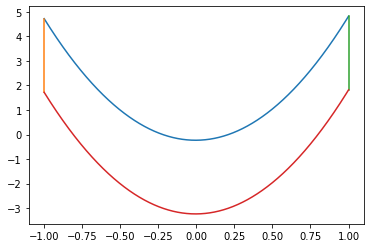

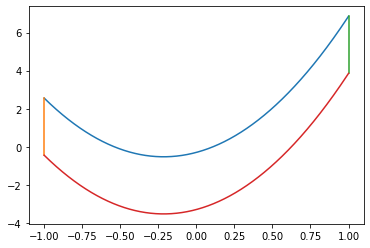

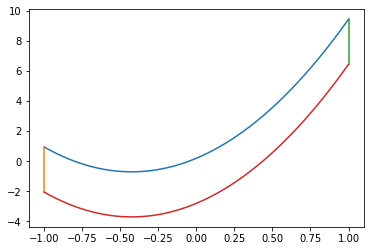

In [61]:
a = 3
b = 4
c = 5
d = 6
e = 7
f = 1
start = (-1, -1)
width = 1
length = 1
surface(a, b, c, d, e, f, start, width, length)

In [64]:
a = 12.5
b = 16.666668
c = 7.5
x = 5.18
y = -16.6666 + 1.5
calc_ellipsoid(a, b, c, x, y)

0.10063772619448036

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 0 0


TypeError: only size-1 arrays can be converted to Python scalars

In [93]:
"eclipse" in os.listdir(".")

True